# Exploring the Impact of Legal Drinking Age Changes

Imports and set magics:

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

As the selected Data contains states that are later not from relevance, a list is created that contains the states of relevance

In [12]:
relevant_states = ["Alabama", "Arkansas", "Florida", "California", "Idaho", "Indiana", "Minnesota", "Kentucky", "Wyoming", "Missouri", "Nevada", "New Mexico", "North Dakota", "Oregon", "Pennsylvania", "Utah"]
len(relevant_states)

16

## Disposable income per capita

In [13]:
di_cap_original = pd.read_csv("spi0404-5.csv")
di_cap_original.head(10)
#di_cap_original.describe()

,Per capita disposable personal income 2/,State Code,Region Code,AreaName,1969,1970,1971,1972,1973,1974,...,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003
0,400,0.0,0.0,United States,3321.0,3582.0,3853.0,4129.0,4607.0,5002.0,...,19550.0,20286.0,21089.0,21941.0,23163.0,23974.0,25472.0,26169.0,27253.0,28230.0
1,400,1.0,5.0,Alabama,2412.0,2657.0,2889.0,3152.0,3527.0,3874.0,...,16637.0,17344.0,17842.0,18528.0,19500.0,20095.0,21050.0,22095.0,23086.0,24028.0
2,400,2.0,8.0,Alaska,4071.0,4573.0,4901.0,5141.0,5978.0,6964.0,...,22402.0,22822.0,23003.0,23765.0,24401.0,24932.0,26422.0,28264.0,29641.0,30641.0
3,400,4.0,6.0,Arizona,3053.0,3385.0,3701.0,3965.0,4396.0,4721.0,...,17103.0,17717.0,18306.0,19157.0,20250.0,20966.0,22327.0,22747.0,23607.0,24293.0
4,400,5.0,5.0,Arkansas,2320.0,2535.0,2795.0,3070.0,3575.0,3899.0,...,15563.0,16170.0,16920.0,17424.0,18146.0,18749.0,19377.0,20482.0,21252.0,22123.0
5,400,6.0,8.0,California,3958.0,4275.0,4526.0,4815.0,5298.0,5819.0,...,20544.0,21263.0,22011.0,22793.0,24258.0,25087.0,26718.0,27493.0,28806.0,29798.0
6,400,8.0,7.0,Colorado,3191.0,3558.0,3902.0,4174.0,4640.0,5101.0,...,20120.0,21175.0,22174.0,23068.0,24565.0,25948.0,28236.0,29073.0,29577.0,30507.0
7,400,9.0,1.0,Connecticut,4081.0,4405.0,4669.0,4943.0,5448.0,5942.0,...,25468.0,26418.0,27105.0,28349.0,30068.0,31148.0,33388.0,34195.0,35541.0,36726.0
8,400,10.0,2.0,Delaware,3642.0,3822.0,4107.0,4436.0,4899.0,5322.0,...,20343.0,21105.0,22071.0,22427.0,23933.0,24518.0,26279.0,26629.0,27972.0,28960.0
9,400,11.0,2.0,District of Columbia,3842.0,4276.0,4791.0,5218.0,5588.0,6290.0,...,26876.0,27245.0,28275.0,29380.0,30608.0,30716.0,33385.0,38093.0,40512.0,42345.0


In [14]:
di_cap = di_cap_original.copy()

In [15]:
# Drop the first three collumns
drop_list = ["Per capita disposable personal income 2/", "State Code", "Region Code"]
di_cap.drop(drop_list, axis = 1, inplace = True)
di_cap.head(10)

,AreaName,1969,1970,1971,1972,1973,1974,1975,1976,1977,...,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003
0,United States,3321.0,3582.0,3853.0,4129.0,4607.0,5002.0,5489.0,5965.0,6509.0,...,19550.0,20286.0,21089.0,21941.0,23163.0,23974.0,25472.0,26169.0,27253.0,28230.0
1,Alabama,2412.0,2657.0,2889.0,3152.0,3527.0,3874.0,4307.0,4773.0,5199.0,...,16637.0,17344.0,17842.0,18528.0,19500.0,20095.0,21050.0,22095.0,23086.0,24028.0
2,Alaska,4071.0,4573.0,4901.0,5141.0,5978.0,6964.0,9055.0,10279.0,10554.0,...,22402.0,22822.0,23003.0,23765.0,24401.0,24932.0,26422.0,28264.0,29641.0,30641.0
3,Arizona,3053.0,3385.0,3701.0,3965.0,4396.0,4721.0,5045.0,5487.0,5945.0,...,17103.0,17717.0,18306.0,19157.0,20250.0,20966.0,22327.0,22747.0,23607.0,24293.0
4,Arkansas,2320.0,2535.0,2795.0,3070.0,3575.0,3899.0,4250.0,4636.0,5104.0,...,15563.0,16170.0,16920.0,17424.0,18146.0,18749.0,19377.0,20482.0,21252.0,22123.0
5,California,3958.0,4275.0,4526.0,4815.0,5298.0,5819.0,6411.0,6972.0,7589.0,...,20544.0,21263.0,22011.0,22793.0,24258.0,25087.0,26718.0,27493.0,28806.0,29798.0
6,Colorado,3191.0,3558.0,3902.0,4174.0,4640.0,5101.0,5602.0,6066.0,6598.0,...,20120.0,21175.0,22174.0,23068.0,24565.0,25948.0,28236.0,29073.0,29577.0,30507.0
7,Connecticut,4081.0,4405.0,4669.0,4943.0,5448.0,5942.0,6437.0,6908.0,7620.0,...,25468.0,26418.0,27105.0,28349.0,30068.0,31148.0,33388.0,34195.0,35541.0,36726.0
8,Delaware,3642.0,3822.0,4107.0,4436.0,4899.0,5322.0,5746.0,6177.0,6647.0,...,20343.0,21105.0,22071.0,22427.0,23933.0,24518.0,26279.0,26629.0,27972.0,28960.0
9,District of Columbia,3842.0,4276.0,4791.0,5218.0,5588.0,6290.0,7007.0,7494.0,8371.0,...,26876.0,27245.0,28275.0,29380.0,30608.0,30716.0,33385.0,38093.0,40512.0,42345.0


In [16]:
#Creating an year variable with di in front
col_dict = {}
for i in range(1969, 2003+1):
    col_dict[str(i)] = f'di{i}'

di_cap.rename(columns = col_dict, inplace=True)
di_cap.head(10)

,AreaName,di1969,di1970,di1971,di1972,di1973,di1974,di1975,di1976,di1977,...,di1994,di1995,di1996,di1997,di1998,di1999,di2000,di2001,di2002,di2003
0,United States,3321.0,3582.0,3853.0,4129.0,4607.0,5002.0,5489.0,5965.0,6509.0,...,19550.0,20286.0,21089.0,21941.0,23163.0,23974.0,25472.0,26169.0,27253.0,28230.0
1,Alabama,2412.0,2657.0,2889.0,3152.0,3527.0,3874.0,4307.0,4773.0,5199.0,...,16637.0,17344.0,17842.0,18528.0,19500.0,20095.0,21050.0,22095.0,23086.0,24028.0
2,Alaska,4071.0,4573.0,4901.0,5141.0,5978.0,6964.0,9055.0,10279.0,10554.0,...,22402.0,22822.0,23003.0,23765.0,24401.0,24932.0,26422.0,28264.0,29641.0,30641.0
3,Arizona,3053.0,3385.0,3701.0,3965.0,4396.0,4721.0,5045.0,5487.0,5945.0,...,17103.0,17717.0,18306.0,19157.0,20250.0,20966.0,22327.0,22747.0,23607.0,24293.0
4,Arkansas,2320.0,2535.0,2795.0,3070.0,3575.0,3899.0,4250.0,4636.0,5104.0,...,15563.0,16170.0,16920.0,17424.0,18146.0,18749.0,19377.0,20482.0,21252.0,22123.0
5,California,3958.0,4275.0,4526.0,4815.0,5298.0,5819.0,6411.0,6972.0,7589.0,...,20544.0,21263.0,22011.0,22793.0,24258.0,25087.0,26718.0,27493.0,28806.0,29798.0
6,Colorado,3191.0,3558.0,3902.0,4174.0,4640.0,5101.0,5602.0,6066.0,6598.0,...,20120.0,21175.0,22174.0,23068.0,24565.0,25948.0,28236.0,29073.0,29577.0,30507.0
7,Connecticut,4081.0,4405.0,4669.0,4943.0,5448.0,5942.0,6437.0,6908.0,7620.0,...,25468.0,26418.0,27105.0,28349.0,30068.0,31148.0,33388.0,34195.0,35541.0,36726.0
8,Delaware,3642.0,3822.0,4107.0,4436.0,4899.0,5322.0,5746.0,6177.0,6647.0,...,20343.0,21105.0,22071.0,22427.0,23933.0,24518.0,26279.0,26629.0,27972.0,28960.0
9,District of Columbia,3842.0,4276.0,4791.0,5218.0,5588.0,6290.0,7007.0,7494.0,8371.0,...,26876.0,27245.0,28275.0,29380.0,30608.0,30716.0,33385.0,38093.0,40512.0,42345.0


In [17]:
#Selecting the relevant states
di_cap_r = di_cap[di_cap['AreaName'].apply(lambda x: x in relevant_states)]

# Reset indexing
di_cap_r.reset_index(inplace = True, drop = True)
di_cap_r

,AreaName,di1969,di1970,di1971,di1972,di1973,di1974,di1975,di1976,di1977,...,di1994,di1995,di1996,di1997,di1998,di1999,di2000,di2001,di2002,di2003
0,Alabama,2412.0,2657.0,2889.0,3152.0,3527.0,3874.0,4307.0,4773.0,5199.0,...,16637.0,17344.0,17842.0,18528.0,19500.0,20095.0,21050.0,22095.0,23086.0,24028.0
1,Arkansas,2320.0,2535.0,2795.0,3070.0,3575.0,3899.0,4250.0,4636.0,5104.0,...,15563.0,16170.0,16920.0,17424.0,18146.0,18749.0,19377.0,20482.0,21252.0,22123.0
2,California,3958.0,4275.0,4526.0,4815.0,5298.0,5819.0,6411.0,6972.0,7589.0,...,20544.0,21263.0,22011.0,22793.0,24258.0,25087.0,26718.0,27493.0,28806.0,29798.0
3,Florida,3215.0,3566.0,3846.0,4148.0,4634.0,4981.0,5362.0,5738.0,6273.0,...,19450.0,20321.0,20962.0,21513.0,22728.0,23509.0,24812.0,25572.0,26674.0,27610.0
4,Idaho,2887.0,3165.0,3354.0,3727.0,4200.0,4758.0,4999.0,5466.0,5793.0,...,16593.0,17206.0,17898.0,18173.0,19192.0,19988.0,20960.0,21819.0,22989.0,23584.0
5,Indiana,3186.0,3309.0,3607.0,3876.0,4487.0,4713.0,5170.0,5704.0,6263.0,...,18225.0,18757.0,19528.0,20247.0,21572.0,22206.0,23649.0,24147.0,24979.0,25929.0
6,Kentucky,2585.0,2801.0,3014.0,3256.0,3676.0,4010.0,4413.0,4857.0,5363.0,...,16110.0,16625.0,17443.0,18218.0,19218.0,19834.0,21346.0,21786.0,22668.0,23567.0
7,Minnesota,3270.0,3554.0,3789.0,4040.0,4804.0,5059.0,5454.0,5854.0,6552.0,...,19964.0,20814.0,21986.0,22994.0,24649.0,25784.0,27187.0,27942.0,29026.0,30397.0
8,Missouri,3085.0,3376.0,3643.0,3889.0,4358.0,4624.0,5120.0,5570.0,6167.0,...,18466.0,19013.0,19777.0,20701.0,21683.0,22345.0,23677.0,24314.0,25365.0,26317.0
9,Nevada,3830.0,4360.0,4674.0,4944.0,5429.0,5752.0,6404.0,6938.0,7593.0,...,21015.0,21941.0,22803.0,23531.0,24576.0,25349.0,26323.0,26387.0,27251.0,28188.0


As the goal is to generate a data set that later can be used to apply an staggerd DID in stata, the data needs to be transformed in the long format.

In [18]:
#Transforming wide to long format
di_long = pd.wide_to_long(di_cap_r, stubnames='di', i='AreaName', j='year')
di_long


,,di
AreaName,year,
Alabama,1969,2412.0
Arkansas,1969,2320.0
California,1969,3958.0
Florida,1969,3215.0
Idaho,1969,2887.0
...,...,...
North Dakota,2003,26902.0
Oregon,2003,26102.0
Pennsylvania,2003,28557.0


## Population

In [19]:
pop_original = pd.read_csv("spi0404-3.csv")
pop_original.head(10)

,Population 1/,State Code,Region Code,AreaName,1969,1970,1971,1972,1973,1974,...,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003
0,600,0.0,0.0,United States,201298000.0,203798722.0,206817509.0,209274882.0,211349205.0,213333635.0,...,263125821.0,266278393.0,269394284.0,272646925.0,275854104.0,279040168.0,282177754.0,285093813.0,287973924.0,290809777.0
1,600,1.0,5.0,Alabama,3440000.0,3449846.0,3497452.0,3540080.0,3580769.0,3627805.0,...,4260229.0,4296800.0,4331102.0,4367935.0,4404701.0,4430141.0,4451601.0,4466440.0,4478896.0,4500752.0
2,600,2.0,8.0,Alaska,296000.0,304328.0,316494.0,326494.0,333232.0,344696.0,...,603308.0,604412.0,608569.0,612968.0,619932.0,624779.0,627576.0,632674.0,641482.0,648818.0
3,600,4.0,6.0,Arizona,1737000.0,1794912.0,1896108.0,2008847.0,2125281.0,2224342.0,...,4245089.0,4432499.0,4586940.0,4736990.0,4883342.0,5023823.0,5165765.0,5297684.0,5441125.0,5580811.0
4,600,5.0,5.0,Arkansas,1913000.0,1930077.0,1972028.0,2018116.0,2058491.0,2100385.0,...,2494019.0,2535399.0,2572109.0,2601090.0,2626289.0,2651860.0,2678322.0,2692041.0,2706268.0,2725714.0
5,600,6.0,8.0,California,19711000.0,20023181.0,20345575.0,20584794.0,20867737.0,21172548.0,...,31484435.0,31696582.0,32018834.0,32486010.0,32987675.0,33499204.0,33999879.0,34533054.0,35001986.0,35484453.0
6,600,8.0,7.0,Colorado,2166000.0,2223979.0,2303502.0,2404576.0,2495803.0,2541318.0,...,3724168.0,3826653.0,3919972.0,4018293.0,4116639.0,4226018.0,4326872.0,4428786.0,4501051.0,4550688.0
7,600,9.0,1.0,Connecticut,3000000.0,3038782.0,3061448.0,3069617.0,3069140.0,3075784.0,...,3316121.0,3324144.0,3336685.0,3349348.0,3365352.0,3386401.0,3411750.0,3432550.0,3458587.0,3483372.0
8,600,10.0,2.0,Delaware,540000.0,550332.0,565207.0,573821.0,579078.0,583150.0,...,717545.0,729734.0,740977.0,751487.0,763335.0,774990.0,786397.0,795576.0,805945.0,817491.0
9,600,11.0,2.0,District of Columbia,762000.0,755087.0,750641.0,743775.0,733674.0,720755.0,...,589239.0,580517.0,572377.0,567736.0,565230.0,570213.0,571437.0,572716.0,569157.0,563384.0


In [20]:
# Creating a copy to always have a fallback
pop = pop_original.copy()


In [21]:
# Drop the first three collumns
drop_list = ["Population 1/", "State Code", "Region Code"]
pop.drop(drop_list, axis = 1, inplace = True)
pop.head(10)

,AreaName,1969,1970,1971,1972,1973,1974,1975,1976,1977,...,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003
0,United States,201298000.0,203798722.0,206817509.0,209274882.0,211349205.0,213333635.0,215456585.0,217553859.0,219760875.0,...,263125821.0,266278393.0,269394284.0,272646925.0,275854104.0,279040168.0,282177754.0,285093813.0,287973924.0,290809777.0
1,Alabama,3440000.0,3449846.0,3497452.0,3540080.0,3580769.0,3627805.0,3680533.0,3737204.0,3782736.0,...,4260229.0,4296800.0,4331102.0,4367935.0,4404701.0,4430141.0,4451601.0,4466440.0,4478896.0,4500752.0
2,Alaska,296000.0,304328.0,316494.0,326494.0,333232.0,344696.0,370973.0,393115.0,397363.0,...,603308.0,604412.0,608569.0,612968.0,619932.0,624779.0,627576.0,632674.0,641482.0,648818.0
3,Arizona,1737000.0,1794912.0,1896108.0,2008847.0,2125281.0,2224342.0,2286348.0,2347976.0,2427310.0,...,4245089.0,4432499.0,4586940.0,4736990.0,4883342.0,5023823.0,5165765.0,5297684.0,5441125.0,5580811.0
4,Arkansas,1913000.0,1930077.0,1972028.0,2018116.0,2058491.0,2100385.0,2158291.0,2168688.0,2207228.0,...,2494019.0,2535399.0,2572109.0,2601090.0,2626289.0,2651860.0,2678322.0,2692041.0,2706268.0,2725714.0
5,California,19711000.0,20023181.0,20345575.0,20584794.0,20867737.0,21172548.0,21536715.0,21934505.0,22350247.0,...,31484435.0,31696582.0,32018834.0,32486010.0,32987675.0,33499204.0,33999879.0,34533054.0,35001986.0,35484453.0
6,Colorado,2166000.0,2223979.0,2303502.0,2404576.0,2495803.0,2541318.0,2586144.0,2632244.0,2696007.0,...,3724168.0,3826653.0,3919972.0,4018293.0,4116639.0,4226018.0,4326872.0,4428786.0,4501051.0,4550688.0
7,Connecticut,3000000.0,3038782.0,3061448.0,3069617.0,3069140.0,3075784.0,3084726.0,3085984.0,3088729.0,...,3316121.0,3324144.0,3336685.0,3349348.0,3365352.0,3386401.0,3411750.0,3432550.0,3458587.0,3483372.0
8,Delaware,540000.0,550332.0,565207.0,573821.0,579078.0,583150.0,588756.0,592755.0,594821.0,...,717545.0,729734.0,740977.0,751487.0,763335.0,774990.0,786397.0,795576.0,805945.0,817491.0
9,District of Columbia,762000.0,755087.0,750641.0,743775.0,733674.0,720755.0,710308.0,696305.0,681768.0,...,589239.0,580517.0,572377.0,567736.0,565230.0,570213.0,571437.0,572716.0,569157.0,563384.0


In [22]:
#Creating a year variable with pop in front
col_dict = {}
for i in range(1969, 2003+1): 
    col_dict[str(i)] = f'pop{i}'

pop.rename(columns = col_dict, inplace=True)
pop

,AreaName,pop1969,pop1970,pop1971,pop1972,pop1973,pop1974,pop1975,pop1976,pop1977,...,pop1994,pop1995,pop1996,pop1997,pop1998,pop1999,pop2000,pop2001,pop2002,pop2003
0,United States,201298000.0,203798722.0,206817509.0,209274882.0,211349205.0,213333635.0,215456585.0,217553859.0,219760875.0,...,263125821.0,266278393.0,269394284.0,272646925.0,275854104.0,279040168.0,282177754.0,285093813.0,287973924.0,290809777.0
1,Alabama,3440000.0,3449846.0,3497452.0,3540080.0,3580769.0,3627805.0,3680533.0,3737204.0,3782736.0,...,4260229.0,4296800.0,4331102.0,4367935.0,4404701.0,4430141.0,4451601.0,4466440.0,4478896.0,4500752.0
2,Alaska,296000.0,304328.0,316494.0,326494.0,333232.0,344696.0,370973.0,393115.0,397363.0,...,603308.0,604412.0,608569.0,612968.0,619932.0,624779.0,627576.0,632674.0,641482.0,648818.0
3,Arizona,1737000.0,1794912.0,1896108.0,2008847.0,2125281.0,2224342.0,2286348.0,2347976.0,2427310.0,...,4245089.0,4432499.0,4586940.0,4736990.0,4883342.0,5023823.0,5165765.0,5297684.0,5441125.0,5580811.0
4,Arkansas,1913000.0,1930077.0,1972028.0,2018116.0,2058491.0,2100385.0,2158291.0,2168688.0,2207228.0,...,2494019.0,2535399.0,2572109.0,2601090.0,2626289.0,2651860.0,2678322.0,2692041.0,2706268.0,2725714.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Southeast,43440000.0,43973515.0,45013167.0,46019010.0,46991755.0,47954591.0,48787678.0,49513969.0,50311832.0,...,63574211.0,64601937.0,65611342.0,66655300.0,67626581.0,68569381.0,69489754.0,70294735.0,71145716.0,72018523.0
57,Southwest,16328000.0,16621375.0,17076950.0,17502870.0,17942658.0,18354229.0,18789070.0,19269802.0,19710280.0,...,27772489.0,28419852.0,29019737.0,29625063.0,30239551.0,30827272.0,31390621.0,31934573.0,32519794.0,33085466.0
58,Rocky Mountain,4943000.0,5037873.0,5194044.0,5368407.0,5527390.0,5649835.0,5781745.0,5915555.0,6078758.0,...,8171343.0,8379865.0,8565452.0,8745913.0,8918147.0,9094461.0,9267069.0,9429359.0,9572166.0,9687350.0
59,Far West,26635000.0,27101402.0,27570486.0,27918162.0,28327835.0,28800911.0,29346033.0,29929494.0,30553208.0,...,43271002.0,43744822.0,44314342.0,45053779.0,45798042.0,46505506.0,47199651.0,47950788.0,48639001.0,49323074.0


In [23]:
pop_r = pop[pop['AreaName'].apply(lambda x: x in relevant_states)]
pop_r
# Reset indexing
pop_r.reset_index(inplace = True, drop = True)
pop_r

,AreaName,pop1969,pop1970,pop1971,pop1972,pop1973,pop1974,pop1975,pop1976,pop1977,...,pop1994,pop1995,pop1996,pop1997,pop1998,pop1999,pop2000,pop2001,pop2002,pop2003
0,Alabama,3440000.0,3449846.0,3497452.0,3540080.0,3580769.0,3627805.0,3680533.0,3737204.0,3782736.0,...,4260229.0,4296800.0,4331102.0,4367935.0,4404701.0,4430141.0,4451601.0,4466440.0,4478896.0,4500752.0
1,Arkansas,1913000.0,1930077.0,1972028.0,2018116.0,2058491.0,2100385.0,2158291.0,2168688.0,2207228.0,...,2494019.0,2535399.0,2572109.0,2601090.0,2626289.0,2651860.0,2678322.0,2692041.0,2706268.0,2725714.0
2,California,19711000.0,20023181.0,20345575.0,20584794.0,20867737.0,21172548.0,21536715.0,21934505.0,22350247.0,...,31484435.0,31696582.0,32018834.0,32486010.0,32987675.0,33499204.0,33999879.0,34533054.0,35001986.0,35484453.0
3,Florida,6641000.0,6845353.0,7163026.0,7520324.0,7927099.0,8317034.0,8541660.0,8695356.0,8888958.0,...,14239444.0,14537875.0,14853360.0,15186304.0,15486559.0,15759421.0,16047807.0,16355193.0,16691701.0,17019068.0
4,Idaho,707000.0,717255.0,738749.0,763229.0,782061.0,807973.0,831981.0,856979.0,883446.0,...,1145140.0,1177322.0,1203083.0,1228520.0,1252330.0,1275674.0,1299610.0,1321309.0,1343124.0,1366332.0
5,Indiana,5143000.0,5203700.0,5249921.0,5296129.0,5329122.0,5349886.0,5351080.0,5371552.0,5405075.0,...,5793526.0,5851459.0,5906013.0,5955267.0,5998880.0,6044969.0,6091535.0,6126470.0,6156913.0,6195643.0
6,Kentucky,3198000.0,3230587.0,3298262.0,3336106.0,3371573.0,3417039.0,3468755.0,3530443.0,3575001.0,...,3849088.0,3887427.0,3919535.0,3952747.0,3985390.0,4018053.0,4048635.0,4067336.0,4089822.0,4117827.0
7,Minnesota,3758000.0,3815249.0,3851901.0,3866878.0,3885164.0,3898450.0,3925793.0,3956602.0,3979844.0,...,4610355.0,4660180.0,4712827.0,4763390.0,4813412.0,4873481.0,4933648.0,4985202.0,5024791.0,5059375.0
8,Missouri,4640000.0,4684768.0,4722703.0,4753234.0,4774601.0,4785391.0,4795383.0,4823554.0,4845042.0,...,5324497.0,5378247.0,5431553.0,5481193.0,5521765.0,5561948.0,5605995.0,5636220.0,5669544.0,5704484.0
9,Nevada,480000.0,493223.0,519989.0,546736.0,568910.0,596713.0,619847.0,646823.0,678134.0,...,1499298.0,1581578.0,1666320.0,1764104.0,1853191.0,1934718.0,2018104.0,2094633.0,2167455.0,2241154.0


In [24]:
#Transforming wide to long format
pop_long = pd.wide_to_long(pop_r, stubnames='pop', i='AreaName', j='year')
pop_long


,,pop
AreaName,year,
Alabama,1969,3440000.0
Arkansas,1969,1913000.0
California,1969,19711000.0
Florida,1969,6641000.0
Idaho,1969,707000.0
...,...,...
North Dakota,2003,633837.0
Oregon,2003,3559596.0
Pennsylvania,2003,12365455.0


## Employment and social contribution of the goverment

In [25]:
emp_original = pd.read_csv("CAINC4__ALL_AREAS_1969_2022.csv" , encoding='latin1') #Different encoding mechanism needed as this csv data contains some "" in the relevant cloumns, the utf8 encoder appears to be not able to handle this
emp_original.head(5)

/var/folders/wl/f4zqjbyn0gn_wrprwwl7y7t40000gn/T/ipykernel_25677/3279317229.py:1: DtypeWarning: Columns (2,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  emp_original = pd.read_csv("CAINC4__ALL_AREAS_1969_2022.csv" , encoding='latin1') #Diffrent encoding mechanism needed as this csv data contains some "" in the relevant cloumns, the utf8 encoder appears to be not able to handle this


,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"""00000""",United States,,CAINC4,10.0,...,Personal income (thousands of dollars),Thousands of dollars,791229000,855525000,...,14063283000,14778160000,15467113000,15884741000,16658962000,17514402000,18343601000,19609985000,21392812000,21820248000
1,"""00000""",United States,,CAINC4,11.0,...,Nonfarm personal income 1/,Thousands of dollars,773954000,838026000,...,13939981000,14674150000,15379910000,15816068000,16584389000,17450632000,18277857000,19532094000,21287027000,21709709000
2,"""00000""",United States,,CAINC4,12.0,...,Farm income 2/,Thousands of dollars,17275000,17499000,...,123302000,104010000,87203000,68673000,74573000,63770000,65744000,77891000,105785000,110539000
3,"""00000""",United States,,CAINC4,20.0,...,Population (persons) 3/,Number of persons,201298000,203798722,...,316735375,319270047,321829327,324367742,326623063,328542157,330233102,331511512,332031554,333287557
4,"""00000""",United States,,CAINC4,30.0,...,Per capita personal income (dollars) 4/,Dollars,3931,4198,...,44401,46287,48060,48971,51004,53309,55547,59153,64430,65470


In [26]:
# Creating a copy to always have a fallback
emp = emp_original.copy()

In [27]:
#First selecting the variables of intrest which are employment and social contribution per state
#Selecting the states of interest
I = emp.Description.str.contains('Total employment')
I |= emp.Description.str.contains('Less: Contributions for government social insurance 5/')


emp_rel = emp.loc[I == True]
emp_rel.head(2)

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
6,"""00000""",United States,,CAINC4,36.0,...,Less: Contributions for government social insu...,Thousands of dollars,43791000,46012000,...,1102460000,1151698000,1202909000,1237223000,1297292000,1359444000,1422193000,1446796000,1555569000,1698994000
20,"""00000""",United States,,CAINC4,7010.0,...,Total employment,Number of jobs,91053200,91277600,...,182328100,186239800,190325800,193425900,196394100,200292200,201635200,195286600,202752100,212442000


In [28]:
#Dropping the irrelevant columns
drop_list = ["GeoFIPS", "Region",  "TableName", "LineCode", "IndustryClassification", "Unit"]
emp_rel.drop(drop_list, axis = 1, inplace = True)
emp_rel
emp_rel.reset_index(inplace = True, drop = True)

/var/folders/wl/f4zqjbyn0gn_wrprwwl7y7t40000gn/T/ipykernel_25677/4234529506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_rel.drop(drop_list, axis = 1, inplace = True)


In [29]:
emp_rel

,GeoName,Description,1969,1970,1971,1972,1973,1974,1975,1976,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,United States,Less: Contributions for government social insu...,43791000,46012000,50859000,58897000,75183000,84872000,88974000,100987000,...,1102460000,1151698000,1202909000,1237223000,1297292000,1359444000,1422193000,1446796000,1555569000,1698994000
1,United States,Total employment,91053200,91277600,91581400,94312200,98427500,100111800,98900600,101591200,...,182328100,186239800,190325800,193425900,196394100,200292200,201635200,195286600,202752100,212442000
2,Alabama,Less: Contributions for government social insu...,550477,590084,654716,765219,983117,1136054,1221733,1422114,...,13675855,14068933,14541926,14816665,15394434,16253393,16862810,17508733,18630738,20188589
3,Alabama,Total employment,1411234,1412928,1423459,1470523,1525967,1552266,1543312,1593952,...,2523020,2552256,2587641,2619761,2649222,2692424,2712086,2671005,2769464,2869931
4,"Autauga, AL",Less: Contributions for government social insu...,2163,2367,2662,3367,4789,5344,5454,6635,...,72227,74252,77263,80965,84442,89882,93565,98198,102452,112592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,Southwest,Total employment,7218590,7310759,7457193,7807000,8214605,8510949,8632724,9000734,...,22227900,22807277,23342311,23707577,24232587,24886473,25258799,24957252,26053153,27471405
6396,Rocky Mountain,Less: Contributions for government social insu...,880811,961534,1101556,1320255,1728388,2001949,2178501,2511602,...,39019759,41460588,43323047,44701309,47416398,50260086,53027297,55552407,60072167,66936819
6397,Rocky Mountain,Total employment,2216290,2270924,2342846,2481637,2645947,2739588,2778108,2912267,...,7056128,7252645,7456197,7642496,7837183,8057740,8155512,8120846,8513161,8929322
6398,Far West,Less: Contributions for government social insu...,6625545,6894440,7515490,8728854,11057687,12600108,13655654,15727116,...,199349199,210370210,222573612,231944637,244870464,259121727,273212044,278251258,304455913,330995589


In [30]:
#Selection of relevant states
emp_r = emp_rel[emp_rel['GeoName'].apply(lambda x: x in relevant_states)]
emp_r.reset_index(inplace = True, drop = True)
emp_r

,GeoName,Description,1969,1970,1971,1972,1973,1974,1975,1976,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Alabama,Less: Contributions for government social insu...,550477,590084,654716,765219,983117,1136054,1221733,1422114,...,13675855,14068933,14541926,14816665,15394434,16253393,16862810,17508733,18630738,20188589
1,Alabama,Total employment,1411234,1412928,1423459,1470523,1525967,1552266,1543312,1593952,...,2523020,2552256,2587641,2619761,2649222,2692424,2712086,2671005,2769464,2869931
2,Arkansas,Less: Contributions for government social insu...,278076,296095,340037,404704,524375,608524,638331,744772,...,8239762,8599271,8866044,8981131,9311512,9585738,10070576,10618354,11200412,12120483
3,Arkansas,Total employment,799917,805274,830624,867240,901673,927399,904885,941116,...,1569358,1587408,1610799,1629734,1639903,1658212,1663920,1639829,1686444,1755536
4,California,Less: Contributions for government social insu...,4827173,5017584,5449349,6333131,7973075,9013253,9599500,10977857,...,139677841,147558065,156332539,163059362,171586795,181977942,192127363,195390370,213653284,230968885
5,California,Total employment,9032738,9056897,9036074,9368468,9843939,10163089,10286346,10632968,...,21318697,21996861,22687175,23177961,23548874,24077466,24225068,23154091,23934549,25300974
6,Florida,Less: Contributions for government social insu...,1132486,1272457,1473193,1797755,2422176,2782052,2860146,3169655,...,56738107,59769818,62920757,65689113,69210646,73845538,78919354,81397272,88822118,99413074
7,Florida,Total employment,2856879,2966065,3082056,3338247,3666224,3765563,3675506,3729843,...,10539527,10937534,11367164,11682273,12098388,12556216,12761155,12719592,13458025,14227252
8,Idaho,Less: Contributions for government social insu...,126332,136255,153561,182373,238902,280968,314170,368311,...,4653139,4855524,5071654,5325472,5694817,6057048,6392861,6966849,7570444,8369604
9,Idaho,Total employment,315337,324150,332158,346866,365091,381309,393178,419224,...,903016,925548,949392,976719,1007831,1041387,1063687,1077864,1137618,1190624


This table needs to be brought in the same long format as the previous data frames. However, as can be seen above, is the current table not in the classic wide format as before. The problem is that we now do have two variables of interest, which are dependent on the same years. The data frame is basically already in long format but diffrently sorted.

In [31]:
# Bringing the data in the same form as the previous data sets. 
# Create a dictionary to map the current descriptions to new ones 
desc_dict = {
    'Total employment ': 'emp',
    'Less: Contributions for government social insurance 5/': 'soc_gov'
}

# Replace the names in the DataFrame
emp_r['Description'] = emp_r['Description'].replace(desc_dict)

# Melt the DataFrame to make it longer 
emp_r_melted = emp_r.melt(id_vars=['GeoName', 'Description'], var_name='Year', value_name='Value')
#This step transforms the DataFrame emp_r from wide format to long format. It is specified to keep ('State' and 'Description')- The rest is melted into two new columns: 'Year' and 'Value'.
#For intrest in exact format print emp_r_melted. The most important step is that the year is now a collumn.

# Pivot the melted DataFrame to make it wider to gete soc_gov and emp in its own collumn
emp_r_pivot = emp_r_melted.pivot_table(index=['Year', 'GeoName'], columns='Description', values='Value', aggfunc='sum')

# Reset the index to make 'Year' and 'State' regular columns again
emp_r_pivot.reset_index(inplace=True)

emp_r_pivot.columns.name = None # As Description was the name of the column vector which was needed to create the requiered format.


/var/folders/wl/f4zqjbyn0gn_wrprwwl7y7t40000gn/T/ipykernel_25677/1763653722.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_r['Description'] = emp_r['Description'].replace(desc_dict)


In [32]:
emp_r_pivot

,Year,GeoName,emp,soc_gov
0,1969,Alabama,1411234,550477
1,1969,Arkansas,799917,278076
2,1969,California,9032738,4827173
3,1969,Florida,2856879,1132486
4,1969,Idaho,315337,126332
...,...,...,...,...
859,2022,North Dakota,587819,4581134
860,2022,Oregon,2658285,24898034
861,2022,Pennsylvania,7978320,65626704
862,2022,Utah,2367996,16568957


# Merging the Data sets

The first merge is goint to be the data sets di_long and pop_long.

In [33]:
# Python checks if we're doing the merge we're expecting to do and finds no error
di_pop = pd.merge(di_long,pop_long,on=['AreaName','year'],how='outer',validate='1:1')


In [34]:
#Renaming di as it is the disposable income per capita
di_pop.rename(columns = {"di" : "di_cap"}, inplace = True)


In [35]:
di_pop.head(5)

,,di_cap,pop
AreaName,year,,
Alabama,1969,2412.0,3440000.0
Arkansas,1969,2320.0,1913000.0
California,1969,3958.0,19711000.0
Florida,1969,3215.0,6641000.0
Idaho,1969,2887.0,707000.0


In [36]:
di_pop.head(5)

,,di_cap,pop
AreaName,year,,
Alabama,1969,2412.0,3440000.0
Arkansas,1969,2320.0,1913000.0
California,1969,3958.0,19711000.0
Florida,1969,3215.0,6641000.0
Idaho,1969,2887.0,707000.0


In [37]:
print(di_pop.columns)
print(di_long.columns)
print(di_pop.index.levels)


Index(['di_cap', 'pop'], dtype='object')
Index(['di'], dtype='object')
[['Alabama', 'Arkansas', 'California', 'Florida', 'Idaho', 'Indiana', 'Kentucky', 'Minnesota', 'Missouri', 'Nevada', 'New Mexico', 'North Dakota', 'Oregon', 'Pennsylvania', 'Utah', 'Wyoming'], [1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003]]


Next is the merging of di_pop and emp_r_pivot

In [38]:
#As the variables are named diffrently we rename them in emp_r_pivot
emp_r_pivot.rename(columns = {"GeoName" : "AreaName", "Year" : "year"}, inplace = True)
emp_r_pivot.head(5)

,year,AreaName,emp,soc_gov
0,1969,Alabama,1411234,550477
1,1969,Arkansas,799917,278076
2,1969,California,9032738,4827173
3,1969,Florida,2856879,1132486
4,1969,Idaho,315337,126332


In [39]:
#As the di_pop has Multilevel in the data frame we reset this to the same
di_pop.reset_index(level=['AreaName', 'year'], inplace=True)
di_pop.head(5)

,AreaName,year,di_cap,pop
0,Alabama,1969,2412.0,3440000.0
1,Arkansas,1969,2320.0,1913000.0
2,California,1969,3958.0,19711000.0
3,Florida,1969,3215.0,6641000.0
4,Idaho,1969,2887.0,707000.0


The first merge attempt did not work as the year variable contained of diffrent data types. Therfore, the data types are unified.

In [40]:
print(di_pop['year'].dtype)
print(emp_r_pivot['year'].dtype)


int64
object


In [41]:
di_pop['year'] = di_pop['year'].astype(int)
emp_r_pivot['year'] = emp_r_pivot['year'].astype(int)


In [42]:
di_pop_emp = pd.merge(di_pop, emp_r_pivot, on= ["AreaName", "year"], how = "outer", validate = "1:1")

In [43]:
di_pop_emp.head(5)

,AreaName,year,di_cap,pop,emp,soc_gov
0,Alabama,1969,2412.0,3440000.0,1411234,550477
1,Arkansas,1969,2320.0,1913000.0,799917,278076
2,California,1969,3958.0,19711000.0,9032738,4827173
3,Florida,1969,3215.0,6641000.0,2856879,1132486
4,Idaho,1969,2887.0,707000.0,315337,126332


In [44]:
print(di_pop_emp.columns)

Index(['AreaName', 'year', 'di_cap', 'pop', 'emp', 'soc_gov'], dtype='object')


The merging process is now completed.

# Interpretation

As the data for employment and the social goverment contribution is absolute terms the first step is to create everything in per capita terms.

In [45]:
di_pop_emp['emp'] = di_pop_emp['emp'].astype(float) #As here the types did also not matched
di_pop_emp['emp_cap'] = di_pop_emp['emp'] / di_pop_emp['pop']

In [46]:
 #As here the types did also not matched
di_pop_emp['soc_gov'] = di_pop_emp['soc_gov'].astype(float) 
di_pop_emp['soc_gov_cap'] = di_pop_emp['soc_gov'] / di_pop_emp['pop']

Creating a group id depending on when or if the countries had an increase in the legal drinking age. Group 1 reperesnt countries with an increaase in the drinking age in 1986, group 2 in 1987 and group 3 in 1988. In countries of group 4 was no change in drinking age.

In [47]:
def assign_group_id(state):
    if state in ['Alabama', 'Florida', 'Minnesota']:
        return 1
    elif state == 'Idaho':
        return 2
    elif state == 'Wyoming':
        return 3
    else:
        return 4

di_pop_emp['group_id'] = di_pop_emp['AreaName'].apply(assign_group_id)

For the countries that get treatment a time to event vriable is created.

In [48]:
def calculate_time_to_event(row):
    if row['group_id'] == 1:
        return row['year'] - 1986
    elif row['group_id'] == 2:
        return row['year'] - 1987
    elif row['group_id'] == 3:
        return row['year'] - 1988
    else:
        return None

di_pop_emp['time_to_event'] = di_pop_emp.apply(calculate_time_to_event, axis=1)

In [50]:
di_pop_emp.head(10)

,AreaName,year,di_cap,pop,emp,soc_gov,emp_cap,soc_gov_cap,group_id,time_to_event
0,Alabama,1969,2412.0,3440000.0,1411234.0,550477.0,0.410242,0.160022,1,-17.0
1,Arkansas,1969,2320.0,1913000.0,799917.0,278076.0,0.418148,0.145361,4,NaN
2,California,1969,3958.0,19711000.0,9032738.0,4827173.0,0.458259,0.244897,4,NaN
3,Florida,1969,3215.0,6641000.0,2856879.0,1132486.0,0.430188,0.170529,1,-17.0
4,Idaho,1969,2887.0,707000.0,315337.0,126332.0,0.446021,0.178687,2,-18.0
5,Indiana,1969,3186.0,5143000.0,2326793.0,1096673.0,0.452419,0.213236,4,NaN
6,Kentucky,1969,2585.0,3198000.0,1331869.0,509229.0,0.416469,0.159234,4,NaN
7,Minnesota,1969,3270.0,3758000.0,1690875.0,780755.0,0.449940,0.207758,1,-17.0
8,Missouri,1969,3085.0,4640000.0,2215957.0,954468.0,0.477577,0.205704,4,NaN
9,Nevada,1969,3830.0,480000.0,243701.0,131902.0,0.507710,0.274796,4,NaN


## Plots

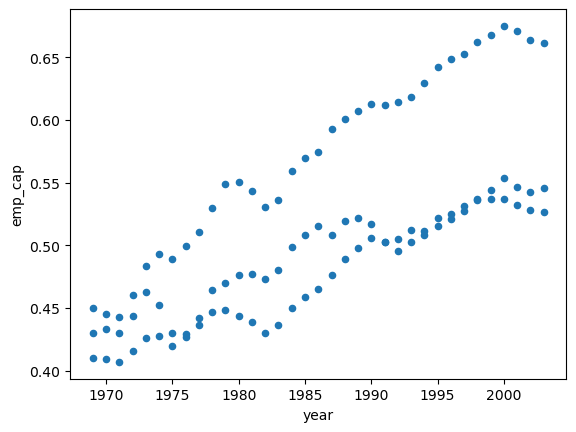

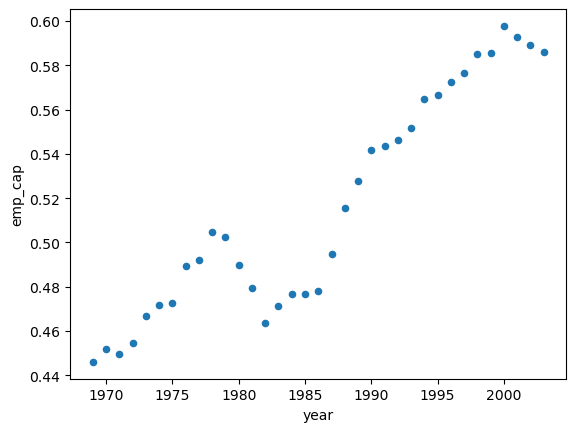

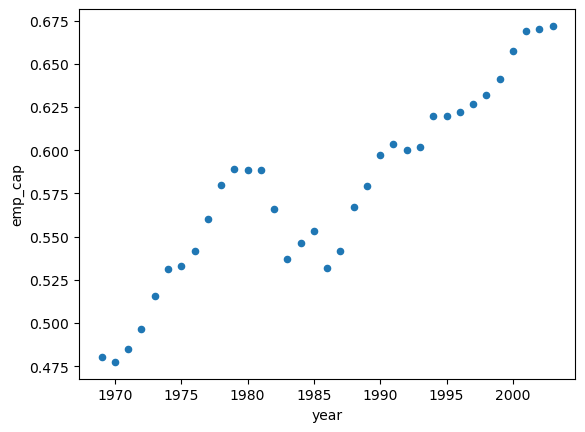

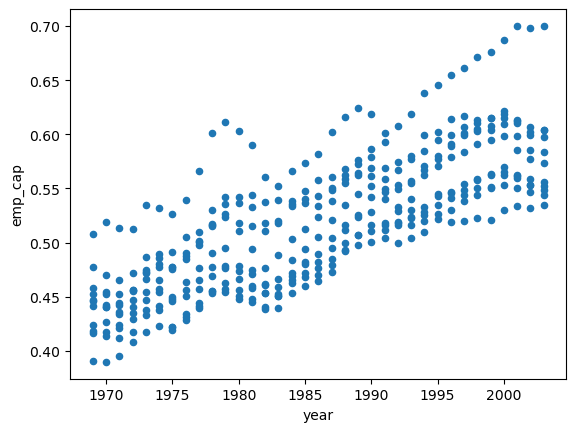

In [60]:
di_pop_emp.groupby('group_id').plot(kind = 'scatter', x = 'year', y = 'emp_cap')

plt.show()

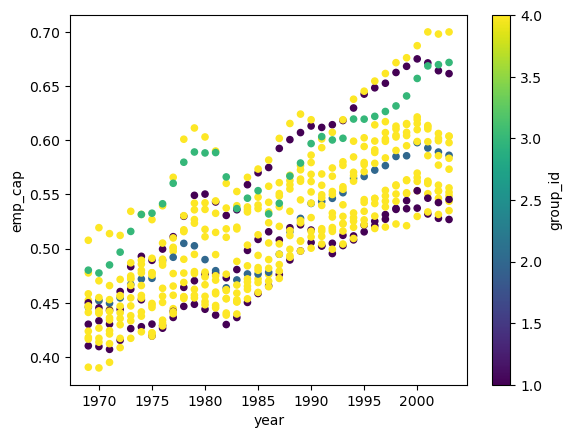

In [58]:
ax2 = di_pop_emp.plot.scatter(x='year',
                      y='emp_cap',
                      c='group_id',
                      colormap='viridis')